In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/hp/Desktop/new/abcd.csv")
print(data.head(5))

  fogground  snowfall dust  snowdepth mist drizzle hail  fastest2minwindspeed  \
0        No       0.0   No        0.0  Yes      No   No                 17.90   
1        No       0.0   No        0.0   No      No   No                 23.04   
2        No       0.0   No        0.0   No      No   No                 21.03   
3        No       0.0   No        0.0   No      No   No                 23.94   
4        No       0.0   No        0.0   No      No   No                 16.11   

  thunder glaze  ... freezingrain rain highwind        date  precipitation  \
0      No    No  ...           No  Yes       No  2007-01-06           0.13   
1      No    No  ...           No  Yes       No  2007-01-09           0.00   
2      No    No  ...           No   No       No  2007-01-14           0.00   
3      No    No  ...           No   No       No  2007-01-15           0.00   
4      No    No  ...           No   No       No  2007-01-20           0.00   

  fogheavy  smokehaze avgwindspeed fastest2m

In [3]:

data['rain'] =data['rain'].astype('category').cat.codes
corr_matrix = data.corr()
print(corr_matrix["temperaturemax"].sort_values(ascending=False))


temperaturemax          1.000000
temperaturemin          0.906176
fastest2minwindspeed    0.093952
fastest5secwindspeed    0.056057
fastest5secwinddir      0.045065
avgwindspeed            0.035472
fastest2minwinddir      0.031431
precipitation           0.002125
rain                   -0.006407
snowfall               -0.135815
snowdepth              -0.161481
Name: temperaturemax, dtype: float64


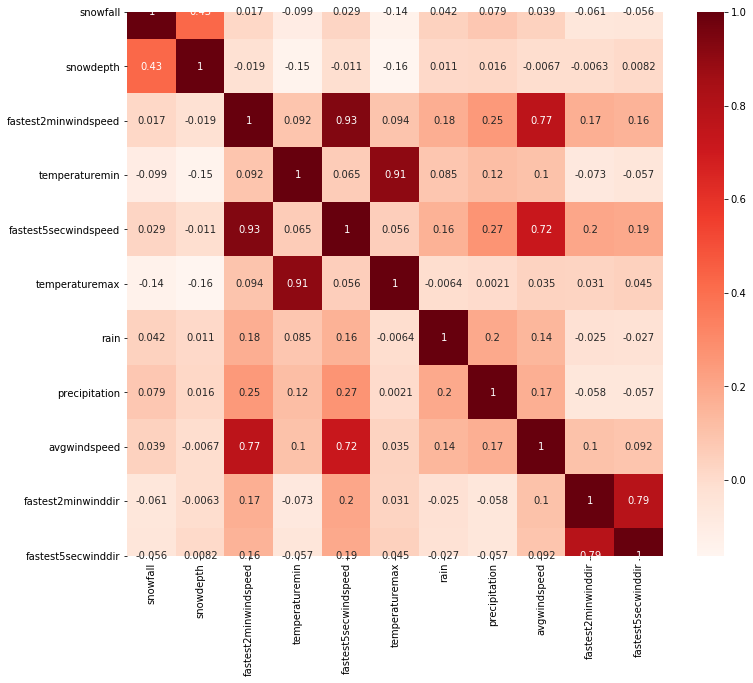

In [4]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["temperaturemax"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

temperaturemin    0.906176
temperaturemax    1.000000
Name: temperaturemax, dtype: float64

In [6]:
#Removing duplicates
data.shape

(4847, 28)

In [7]:
data.drop_duplicates(inplace=True)


In [8]:
data.shape

(4847, 28)

In [9]:
#To check null values
data.isnull().sum()

fogground                0
snowfall                 1
dust                     0
snowdepth                1
mist                     0
drizzle                  0
hail                     0
fastest2minwindspeed     2
thunder                  0
glaze                    0
snow                     0
ice                      0
fog                      0
temperaturemin           1
fastest5secwindspeed    19
freezingfog              0
temperaturemax           1
blowingsnow              0
freezingrain             0
rain                     0
highwind                 0
date                     0
precipitation            1
fogheavy                 0
smokehaze                0
avgwindspeed             3
fastest2minwinddir       2
fastest5secwinddir      19
dtype: int64

In [10]:
data.dtypes

fogground                object
snowfall                float64
dust                     object
snowdepth               float64
mist                     object
drizzle                  object
hail                     object
fastest2minwindspeed    float64
thunder                  object
glaze                    object
snow                     object
ice                      object
fog                      object
temperaturemin          float64
fastest5secwindspeed    float64
freezingfog              object
temperaturemax          float64
blowingsnow              object
freezingrain             object
rain                       int8
highwind                 object
date                     object
precipitation           float64
fogheavy                 object
smokehaze                object
avgwindspeed            float64
fastest2minwinddir      float64
fastest5secwinddir      float64
dtype: object

In [11]:

import numpy as np
np.unique(data['rain'])
mapping={label:idx for idx, label in enumerate(np.unique(data['rain']))}
mapping


{0: 0, 1: 1}

In [12]:

data['rain']=data['rain'].map(mapping)
data


,fogground,snowfall,dust,snowdepth,mist,drizzle,hail,fastest2minwindspeed,thunder,glaze,...,freezingrain,rain,highwind,date,precipitation,fogheavy,smokehaze,avgwindspeed,fastest2minwinddir,fastest5secwinddir
0,No,0.0,No,0.0,Yes,No,No,17.90,No,No,...,No,1,No,2007-01-06,0.13,No,No,8.05,230.0,230.0
1,No,0.0,No,0.0,No,No,No,23.04,No,No,...,No,1,No,2007-01-09,0.00,No,No,7.61,280.0,270.0
2,No,0.0,No,0.0,No,No,No,21.03,No,No,...,No,0,No,2007-01-14,0.00,No,No,8.50,230.0,230.0
3,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0,No,2007-01-15,0.00,No,No,13.20,230.0,230.0
4,No,0.0,No,0.0,No,No,No,16.11,No,No,...,No,0,No,2007-01-20,0.00,No,No,4.92,290.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0,No,2020-03-09,0.00,No,No,11.41,230.0,230.0
4843,No,0.0,No,0.0,No,No,No,17.00,Yes,No,...,No,0,No,2020-03-25,0.86,No,No,7.16,280.0,280.0
4844,No,0.0,No,0.0,No,No,No,14.99,No,No,...,No,0,No,2020-03-26,0.00,No,No,5.14,230.0,230.0
4845,No,0.0,No,0.0,No,No,No,17.00,No,No,...,No,0,No,2020-03-27,0.00,No,No,8.50,240.0,230.0


In [13]:
todummy_list=['fogground','dust','mist','drizzle','hail','thunder','glaze','snow','ice','fog','freezingfog','blowingsnow','freezingrain','highwind','fogheavy','smokehaze']

In [14]:

def dummy_df(data, todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(data[x], prefix=x, dummy_na=False)
        data=data.drop(x,1)
        data=pd.concat([data,dummies],axis=1)
    return data


In [15]:

df=dummy_df(data,todummy_list)
print(df.head(5))


   snowfall  snowdepth  fastest2minwindspeed  temperaturemin  \
0       0.0        0.0                 17.90            50.0   
1       0.0        0.0                 23.04            30.0   
2       0.0        0.0                 21.03            50.0   
3       0.0        0.0                 23.94            57.0   
4       0.0        0.0                 16.11            26.1   

   fastest5secwindspeed  temperaturemax  rain        date  precipitation  \
0                 21.92            71.1     1  2007-01-06           0.13   
1                 29.08            55.0     1  2007-01-09           0.00   
2                 25.05            73.9     0  2007-01-14           0.00   
3                 29.08            73.9     0  2007-01-15           0.00   
4                 21.03            48.0     0  2007-01-20           0.00   

   avgwindspeed  ...  blowingsnow_No  blowingsnow_Yes  freezingrain_No  \
0          8.05  ...               1                0                1   
1         

In [16]:
df=df.drop('date',1)


In [17]:
x=df.drop('rain',1)
y=df.rain

In [18]:
df.shape

(4847, 43)

In [19]:
#imputer
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(x)
x=pd.DataFrame(data=imp.transform(x),columns=x.columns)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
x.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
for index in range(1,42):
    sel= RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(x_train, y_train)
    x_train_rfe=sel.transform(x_train)
    x_test_rfe=sel.transform(x_test)
    print("selected feature", index )
    classifier=LogisticRegression(random_state=0)
    classifier.fit(x_train_rfe,y_train)
    y_pred=classifier.predict(x_test_rfe)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
        
    

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
sel= RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=15)
sel.fit(x_train, y_train)

In [ ]:
#these are the important features
features=x_train.columns[sel.get_support()]
features

In [ ]:
x_train_reg=sel.transform(x_train)
x_test_reg=sel.transform(x_test)

In [ ]:
#feature scaling(-1 and 1) will make alogorithm fast to run
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train_reg)
x_test=sc_x.transform(x_test_reg)


In [ ]:
'''
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_entropy = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Results Using Entropy:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

print("Classification report:")
print(classification_report(y_test, y_pred_entropy))
'''

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
classifier=RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))


In [ ]:
#evaluation
#applying k-fold cross validation to check model performance
#we will get 10 accoracies based 10 test set
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier, X = x_train, y = y_train, cv=10)
print("Evatulation accuracy with K-fold cross validation:",accuracies.mean()*100,"%")